In [1]:
!nvidia-smi

Thu Aug 26 01:43:37 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [28]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

num_classes = 10
input_shape = (28,28,1)

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


image_data->(R+G+B) / 3 -> 0~255숫자 -> 픽셀
0~255 숫자가 너무큼 -> 정규화(0~1로바꿔줌)


In [26]:
y_test.shape

(10000, 10)

In [29]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [17]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
#X_train.shape[0] : image수, 28*28*1로 resahpe하겠다.
X_test = X_test.reshape(X_test.shape[0],28,28,1)

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [23]:
y_train = y_train.reshape(y_train.shape[0],28,28,1)


In [6]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
model = keras.Sequential([
                          layers.Conv2D(32,kernel_size=(3,3),activation='relu',
                                        input_shape = (28, 28, 1)),
                                        layers.MaxPooling2D(pool_size=(2,2)),
                                        layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
                                        layers.MaxPooling2D(pool_size=(2,2)),
                                        layers.Flatten(),
                                        layers.Dropout(0.5),
                                        layers.Dense(num_classes,activation='softmax')
                                        ])
# dropout : 가지치기 : 0.5비율로 랜덤하게 가지치기 - 파라미터가 많기때문에


In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [9]:
batch_size = 128
epoch =15
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
model.fit(X_train,y_train,batch_size=batch_size, epochs=epoch, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 33s 10ms/step - loss: 0.3714 - accuracy: 0.8855 - val_loss: 0.0877 - val_accuracy: 0.9760
Epoch 2/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1121 - accuracy: 0.9662 - val_loss: 0.0605 - val_accuracy: 0.9842
Epoch 3/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0847 - accuracy: 0.9737 - val_loss: 0.0530 - val_accuracy: 0.9835
Epoch 4/15
422/422 [==============================] - 4s 9ms/step - loss: 0.0733 - accuracy: 0.9775 - val_loss: 0.0441 - val_accuracy: 0.9877
Epoch 5/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0611 - accuracy: 0.9806 - val_loss: 0.0405 - val_accuracy: 0.9877
Epoch 6/15
422/422 [==============================] - 4s 8ms/step - loss: 0.0562 - accuracy: 0.9820 - val_loss: 0.0364 - val_accuracy: 0.9897
Epoch 7/15
422/422 [==============================] - 3s 8ms/step - loss: 0.0519 - accuracy: 0.9837 - val_loss: 0.0348 - val_accuracy: 0.9913
Epoc

In [24]:
model.predict(y_train)

array([[9.2422694e-11, 3.5055618e-11, 4.4543218e-09, ..., 4.5456964e-08,
        1.1512990e-06, 3.4474490e-06],
       [9.9999905e-01, 1.5517267e-15, 1.0496347e-07, ..., 3.3624757e-12,
        7.8574098e-09, 5.3328822e-08],
       [1.7410480e-13, 3.3439956e-06, 8.1477065e-09, ..., 2.7871308e-06,
        1.7101739e-08, 7.0710229e-07],
       ...,
       [3.3987578e-13, 2.7084482e-14, 9.1171841e-14, ..., 6.3590321e-14,
        7.2626669e-08, 3.8447711e-06],
       [1.5825025e-06, 7.3122403e-10, 5.5157568e-07, ..., 1.2233469e-12,
        1.1432106e-06, 4.3425924e-10],
       [1.1471157e-05, 5.2459460e-12, 2.0182979e-06, ..., 7.7895137e-08,
        9.9988413e-01, 9.8929122e-05]], dtype=float32)

In [25]:
y_train.shape

(60000, 28, 28, 1)

In [26]:
arr_2x3x2 = np.array( [ 
                       [ [111, 112], [121, 122], [131, 132] ],
                       [ [211, 212], [221, 222], [231, 232] ] 
                       ] )



In [27]:
arr_2x3x2.shape

(2, 3, 2)

In [29]:
arr_2x3x2[1]

array([[211, 212],
       [221, 222],
       [231, 232]])

In [31]:
y_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

(42000, 28, 28, 1)
Fashion-MNIST ready~


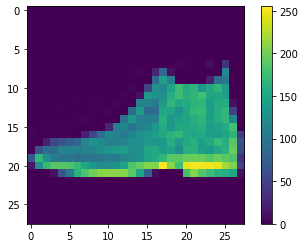

In [23]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터를 다운받습니다.
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위에서 무작위로 3개의 정수를 뽑습니다.
random_idx = np.random.randint(60000, size=sample_size) 

import matplotlib.pyplot as plt

plt.imshow(x_test[0])
plt.colorbar()
plt.grid(False)

# 0 ~ 1 범위로 만듭니다.
x_train = np.reshape(x_train / 255, (-1, 28, 28, 1))
x_test = np.reshape(x_test / 255, (-1, 28, 28, 1))

from tensorflow.keras.utils import to_categorical
# 각 데이터의 레이블을 범주형 형태로 변경합니다.
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 검증 데이터셋을 만듭니다.
from sklearn.model_selection import train_test_split

# 훈련/테스트 데이터를 0.7/0.3의 비율로 분리합니다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
                                                  test_size = 0.3, random_state = 777)
print(x_train.shape)
print('Fashion-MNIST ready~')

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten,BatchNormalization

# 이전과 다르게 리스트 형태로 층을 구성해볼 수 있습니다.
model = Sequential([
    # 항상 모델의 첫 번째 층은 입력의 형태를 명시해주어야 합니다.
    Conv2D(filters = 16, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)), #widthXheightXChannel
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), #maxpooing에서 반절이 줄어듬  
    Conv2D(filters = 32, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'), #Depth를 늘림.
    BatchNormalization(),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Conv2D(filters = 64, kernel_size = 3, strides = (1, 1), padding = 'same', activation = 'relu'),
    MaxPool2D(pool_size = (2, 2), strides = 2, padding = 'same'), 
    Flatten(), # Dense 층에 입력하기 위해 데이터를 펼쳐줍니다.
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax') # 10개의 출력을 가지는 신경망
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          1

In [4]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.fit(x_train, y_train, epochs = 100, validation_split=0.1)

Epoch 1/100
1182/1182 [==============================] - 36s 4ms/step - loss: 0.4278 - acc: 0.8458 - val_loss: 0.3919 - val_acc: 0.8586
Epoch 2/100
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2811 - acc: 0.8971 - val_loss: 0.3017 - val_acc: 0.8888
Epoch 3/100
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2407 - acc: 0.9107 - val_loss: 0.2824 - val_acc: 0.8971
Epoch 4/100
1182/1182 [==============================] - 5s 4ms/step - loss: 0.2116 - acc: 0.9209 - val_loss: 0.2561 - val_acc: 0.9026
Epoch 5/100
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1915 - acc: 0.9280 - val_loss: 0.2809 - val_acc: 0.8967
Epoch 6/100
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1645 - acc: 0.9386 - val_loss: 0.2673 - val_acc: 0.9040
Epoch 7/100
1182/1182 [==============================] - 5s 4ms/step - loss: 0.1528 - acc: 0.9421 - val_loss: 0.2689 - val_acc: 0.9026
Epoch 8/100
1182/1182 [==============================]

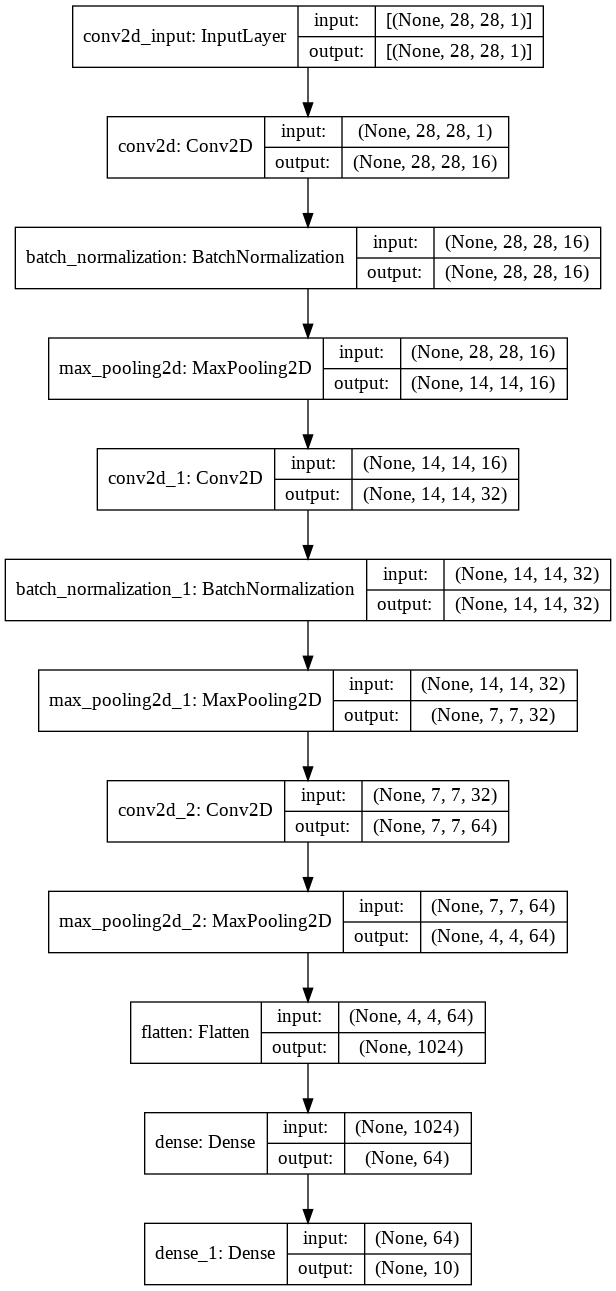

In [16]:
# 각주의 해결 방법을 써도 통하지 않는 다면, 다음 코드의 주석을 풀어 실행시키세요.
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

from tensorflow.keras.utils import plot_model
plot_model(model, './model.png', show_shapes=True)

In [17]:
predicts = model.predict(x_test)

In [19]:
np.argmax(predicts[0])

9

In [24]:
def plot_image(i,predicts_array,true_label,img):
  predicts_array,true_label,img = predicts_array[i],true_label[i],img[i]
  plt.grid(False):
  plt.imshow(img,camp=plt.cm.binary)
  predicts_label = np.argmax(predicts_array)
  if predicts_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel('{} {:2.0f}% ({})').format(y_test[predicts_label],100*np.argmax)

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [25]:
# 사용할 라이브러리 불러오기
import numpy as np
# 숫자 -> One-hot Vector 를 위한 라이브러리
from keras.utils import np_utils
# CIFAR-10 Dataset을 가져오기 위한 라이브러리
from keras.datasets import cifar10, mnist
# 순차적인 모델을 만들기 위한 Sequential 함수
from keras.models import Sequential
# CNN 및 MLP에 필요한 각 층들
from keras.layers import Dense, Activation
from keras.layers import Conv2D, MaxPooling2D, Flatten
# 드롭아웃 적용을 위한 층
from keras.layers import Dropout
# 배치 정규화 적용을 위한 층
from keras.layers import BatchNormalization
# L2 정규화를 위한 라이브러리
from keras.regularizers import l2
# Google Colab에서 이미지를 보기 위한 cv2_imshow 함수
from google.colab.patches import cv2_imshow

170508288/170498071 [==============================] - 5s 0us/step
x_train : (50000, 32, 32, 3)
y_train : (50000, 1)
x_test : (10000, 32, 32, 3)
y_test : (10000, 1)


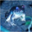

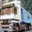

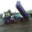

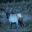

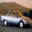

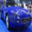

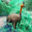

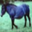

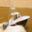

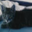

In [30]:
# CIFAR-10 Dataset 가져오기
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train :', np.shape(x_train))
print('y_train :', np.shape(y_train))
print('x_test :', np.shape(x_test))
print('y_test :', np.shape(y_test))
# 한 번 Training Dataset의 이미지 10개 정도 봅시다
for i in range(10):
  cv2_imshow(x_train[i])

In [31]:
type(x_train)

numpy.ndarray

In [36]:
hi = np.array([1,2])
hi.shape

(2,)

In [37]:
# Loss의 스케일 조정을 위해 0 ~ 255 -> 0 ~ 1 범위로 만들어줍니다
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
# 이번엔 Test Dataset을 Validation Set으로 써봅니다
# One-Hot Encoding (숫자 -> One-Hot Vector) 
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print('y_train :', np.shape(y_train))

y_train : (50000, 10)


In [38]:
# 모델 구성하기
# 높이, 너비, 채널(RGB) 설정
width = 32
height = 32
channel = 3
# 순차적 모델을 만들기 위한 Sequential() 함수

#로스펑션은 골짜기에 빠질 수 있다
# 방지하는 방법이 +regularization -> l2(릿지),l1(라쏘)


model = Sequential(name='CIFAR10_CNN_Upgraded')
# filters : Kernel 그룹의 갯수 / kernel_size : Kernel 크기
# padding : 'same'일 경우 입력과 출력 모양이 같도록 0을 주변에 덧댄다
# elu : ReLU 보다 발전된 형태의 활성화 함수 ELU를 써봅니다
# kernel_regularizer : 가중치 규제를 정해줄 수 있습니다. / l2(lambda) : 가중치의 L2 Norm을 목적 함수에 추가하며, lambda에 따라 곱해지는 상수값을 정합니다.
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001),
                 input_shape=(width, height, channel), activation='elu'))
model.add(BatchNormalization()) # BatchNormalization() : 배치 정규화를 위한 층을 추가합니다
model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
# pool_size : MaxPooling 의 Window size
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2)) # Dropout(rate) : 앞의 층에 드롭아웃을 적용합니다. rate 값에 따라 없애고 학습할 노드 비율을 정합니다.
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', kernel_regularizer=l2(0.0001), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
# N차원 배열을 1차원으로 펴줍니다
model.add(Flatten())
# 출력층 MLP
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "CIFAR10_CNN_Upgraded"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64

In [39]:
# 모델 학습과정 설정하기
# loss : 목적 함수
# categorical_crossentropy : 분류가 2개 이상인 CEE
# optimizer : 학습 방법, Adam을 사용합니다.
# metrics : 학습 도중 화면에 어떤 값을 출력할지 결정합니다.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
# 모델 학습시키기
# hist는 Epoch 당 학습 결과를 갖게 됩니다.
hist = model.fit(x_train, y_train,
                 epochs=30,
                 batch_size=32,
                 validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 13s 7ms/step - loss: 1.6513 - acc: 0.4916 - val_loss: 1.1563 - val_acc: 0.6186
Epoch 2/30
1563/1563 [==============================] - 11s 7ms/step - loss: 1.0550 - acc: 0.6572 - val_loss: 1.1171 - val_acc: 0.6387
Epoch 3/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8999 - acc: 0.7131 - val_loss: 0.8891 - val_acc: 0.7297
Epoch 4/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8060 - acc: 0.7512 - val_loss: 0.8291 - val_acc: 0.7491
Epoch 5/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7601 - acc: 0.7736 - val_loss: 0.7112 - val_acc: 0.7956
Epoch 6/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7230 - acc: 0.7937 - val_loss: 0.7288 - val_acc: 0.7977
Epoch 7/30
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6988 - acc: 0.8065 - val_loss: 0.7239 - val_acc: 0.8036
Epoch 8/30
1563/1563 [==============================] -

In [40]:
import tensorflow as tf

In [69]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [70]:

import matplotlib.pyplot as plt
import numpy as np

sample_size = 2
random_idx = np.random.randint(60000,size = sample_size)
random_idx

array([33656, 28288])

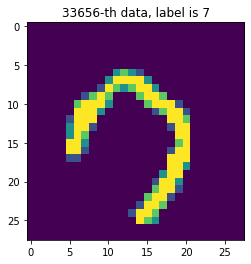

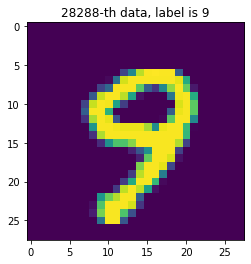

In [71]:
for idx in random_idx:
  img = x_train[idx]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th data, label is %d' %(idx,label))

In [72]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.3,random_state=777)

In [73]:
num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

x_train = (x_train.reshape((num_x_train,28*28)))/255
x_val = (x_val.reshape((num_x_val,28*28)))/255
x_test = (x_test.reshape((num_x_test,28*28)))/255

print(x_train.shape)

(42000, 784)


In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# model = Sequential()
#입력 데이터의 형태를 명시해야됨.
# 784 차원의 데이터를 입력을 받고, 64개의 출력을 가지는 첫번째 Dense 층
# model.add(Dense(64, activation = 'relu', input_shape = (784, ) ) )
# model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
# model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망



model = keras.Sequential([
                          layers.Dense(64, activation = 'relu', input_shape = (784, )),
                          layers.Dense(32, activation = 'relu'),
                          layers.Dense(10, activation = 'softmax')
                                        ])

범주형 형태로 바꾸기 싫다-> loss = 'sparse_categorical_crossentropy'로 바꾸면된다


---



In [100]:
# 학습과정 설정하기.
model.compile(optimizer = 'adam', #옵티마이저 : Adam
              #손실함수 : categorical_crossentropy
              loss =  'sparse_categorical_crossentropy',
              # 모니터링 할 평가지표 : acc
              metrics = ['acc'])

              

In [101]:
# 모델 학습하기
history = model.fit(x_train, y_train,
                    epochs = 30,
                    batch_size = 128,
                    validation_data = (x_val,y_val))

Epoch 1/30
329/329 [==============================] - 2s 4ms/step - loss: 0.5165 - acc: 0.8529 - val_loss: 0.2394 - val_acc: 0.9322
Epoch 2/30
329/329 [==============================] - 1s 4ms/step - loss: 0.2039 - acc: 0.9407 - val_loss: 0.1808 - val_acc: 0.9488
Epoch 3/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1539 - acc: 0.9561 - val_loss: 0.1556 - val_acc: 0.9537
Epoch 4/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1255 - acc: 0.9629 - val_loss: 0.1408 - val_acc: 0.9588
Epoch 5/30
329/329 [==============================] - 1s 3ms/step - loss: 0.1032 - acc: 0.9697 - val_loss: 0.1302 - val_acc: 0.9606
Epoch 6/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0886 - acc: 0.9734 - val_loss: 0.1192 - val_acc: 0.9627
Epoch 7/30
329/329 [==============================] - 1s 3ms/step - loss: 0.0753 - acc: 0.9770 - val_loss: 0.1171 - val_acc: 0.9643
Epoch 8/30
329/329 [==============================] - 1s 3ms/step - loss: 0.

In [102]:
# loss =  'sparse_categorical_crossentropy',
hi = model.predict(x_val)

In [105]:
print(y_val[245])
np.argmax(hi[245])

7


7

In [119]:
from tensorflow.keras.datasets import fashion_mnist

# 데이터를 다운받습니다.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(777)

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

(60000, 28, 28)


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

1. label을 원핫인코딩을 해야하는 것인가? 확인한다
2. 데이터 전처리를 해야하는가?


In [111]:
#데이터 전처리
train_images = train_images / 255.0
test_images = test_images/255.0

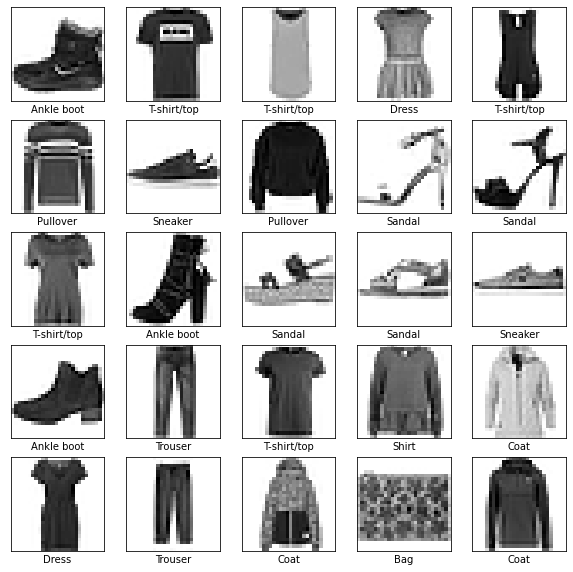

In [117]:
# 데이터 plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap = plt.cm.binary)#gray_scale이기 떄문에,
  plt.xlabel(class_names[train_labels[i]])

